# Chapter 3 신경망

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현하기

In [11]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [12]:
import numpy as np

# numpy 배열을 인수로 받는 계단 함수
def step_function(x):
    y = x > 0
    return y.astype(np.intc)

In [13]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [14]:
y = x > 0
y

array([False,  True,  True])

In [15]:
y = y.astype(np.intc)
y

array([0, 1, 1], dtype=int32)

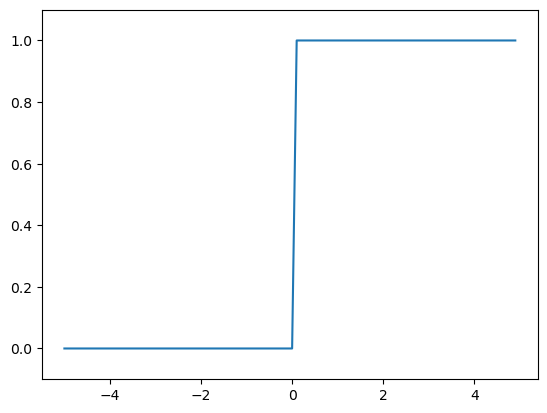

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.intc)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

x의 입력값에 np.array(넘파이 배열)을 넣어도 sigmoid 함수가 처리할 수 있는 이유는 numpy가 broadcasting을 지원하기 때문입니다.

In [19]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


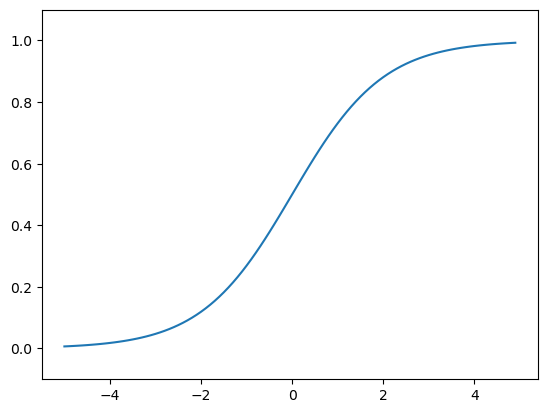

In [20]:
x =np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됩니다.

### 3.2.7 ReLU 함수   
Rectified Linear Unit, 렐루

In [21]:
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [22]:
# 1차원 배열
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [23]:
np.ndim(A) # 배열의 차원수

1

In [24]:
np.shape(A) # 배열의 형상

(4,)

In [25]:
B = np.array([[1, 2,], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [26]:
np.ndim(B)

2

In [27]:
np.shape(B)

(3, 2)

### 3.3.2 행렬의 곱

In [28]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [29]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [30]:
np.dot(A, B) # 행렬의 곱

array([[19, 22],
       [43, 50]])

In [31]:
# 2 x 3 행렬과 3 x 2 행렬의 곱
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [32]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [33]:
A.dot(B)

array([[22, 28],
       [49, 64]])

In [34]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [35]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [36]:
A.shape

(2, 3)

In [37]:
np.dot(A, C) # A(2 x 3)의 첫 번째 차원과 C(2 x 2)의 0번째 차원의 원소 수가 다르기 때문에 오류가 발생

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [38]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [39]:
B = np.array([7 ,8])
B.shape

(2,)

In [40]:
A.dot(B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

In [41]:
X = np.array([1, 2])
X.shape

(2,)

In [42]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
W.shape

[[1 3 5]
 [2 4 6]]


(2, 3)

In [43]:
Y = np.dot(X ,W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

In [44]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

(2, 3)
(2,)
(3,)


In [45]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [46]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)  

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [47]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


## 3.4.3 구현 정리

In [48]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2 ,0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # 책과 결과값 일치

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류(classification)과 회귀(regression) 모두에 이용할 수 있습니다.  
일반적으로 회귀에는 출력층으로 항등 함수를, 분류에는 소프트맥스 함수를 사용합니다.

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [49]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)


[ 1.34985881 18.17414537 54.59815003]


In [50]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [51]:
y = exp_a / sum_exp_a 
print(y)

[0.01821127 0.24519181 0.73659691]


In [52]:
# Softmax 함수 구현
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y 

### 3.5.2 소프트맥스 함수 구현 시 주의점

In [53]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산

/var/folders/z6/xj7t2mkx4pdb7lbxyjn0tbb00000gn/T/ipykernel_18344/608394385.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산
/var/folders/z6/xj7t2mkx4pdb7lbxyjn0tbb00000gn/T/ipykernel_18344/608394385.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산


array([nan, nan, nan])

In [54]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [55]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [56]:
# overflow를 방지한 softmax 함수 구현
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y 

### 3.5.3 소프트맥스 함수의 특징

In [57]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [58]:
np.sum(y)

1.0

Softmax 함수 출력의 총합은 1입니다.  
이 성질 덕분에 softmax 함수의 출력을 '확률'로 해석할 수 있습니다.

## 3.6 손글씨 숫자 인식

In [59]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [60]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

In [61]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [62]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # 이 코드는 어떻게 작동하는거지?
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
    
img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,)
img = img.reshape(28, 28) # Flatten 했던 이미지를 원래 이미지의 모양으로 변경
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리  
입력층 뉴런 784(28 x 28)개, 출력층 뉴런 10(0 ~ 9)개  
은닉층은 총 2개 : 첫 번째 은닉층 뉴런 개수 50개, 두 번째 은닉층 뉴런 개수 100개 (임의로 정한 개수)  

In [63]:
import pickle

In [68]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [69]:
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
        
    return network

In [70]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x ,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [81]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 index를 얻는다
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

In [72]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [79]:
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [85]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])
    
print("Accuracy:" + str(accuracy_cnt / len(x)))

Accuracy:0.9352


In [5]:
import numpy as np

x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=0)
print(x)
print(y)

[[0.1 0.8 0.1]
 [0.3 0.1 0.6]
 [0.2 0.5 0.3]
 [0.8 0.1 0.1]]
[3 0 1]
